In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 56kB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from catboost import CatBoostClassifier
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from imblearn.combine import SMOTETomek
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/PGPDSE/Capstone/CSV Files/Diabetes_Preprocessed_Before_Feature_Selection.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,Not Required,Not Required,1,None,None,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,0,0,1,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,0,-2,-2,-2,-2,1,0,3,0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,0,0,1,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,0,-2,-2,-2,0,1,0,0,0,insulin_combo


In [ ]:
df.shape

(97070, 28)

In [ ]:
X = df.drop('readmitted', 1)
y = df['readmitted']
X_dum = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67949, 27), (29121, 27), (67949,), (29121,))

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed', 'readmitted',
       'preceding_year_visits', 'number_changes', 'insulin_treatment'],
      dtype='object')

In [ ]:
cat_cols = ['race', 'gender','discharge_disposition_id',
       'admission_source_id','diag_1', 'diag_2', 'diag_3','max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed','insulin_treatment']

In [ ]:
model = CatBoostClassifier(iterations=1000,
                           learning_rate=1,
                           depth=2,
                           custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false'],
                           eval_metric='AUC')
model.fit(X_train, y_train, cat_cols)

0:	learn: 0.5519594	total: 86.9ms	remaining: 1m 26s
1:	learn: 0.6269531	total: 173ms	remaining: 1m 26s
2:	learn: 0.6305182	total: 229ms	remaining: 1m 16s
3:	learn: 0.6354729	total: 310ms	remaining: 1m 17s
4:	learn: 0.6382814	total: 398ms	remaining: 1m 19s
5:	learn: 0.6382302	total: 474ms	remaining: 1m 18s
6:	learn: 0.6381445	total: 558ms	remaining: 1m 19s
7:	learn: 0.6392684	total: 641ms	remaining: 1m 19s
8:	learn: 0.6412110	total: 721ms	remaining: 1m 19s
9:	learn: 0.6426964	total: 802ms	remaining: 1m 19s
10:	learn: 0.6433517	total: 876ms	remaining: 1m 18s
11:	learn: 0.6440355	total: 989ms	remaining: 1m 21s
12:	learn: 0.6445652	total: 1.08s	remaining: 1m 22s
13:	learn: 0.6448205	total: 1.16s	remaining: 1m 21s
14:	learn: 0.6455258	total: 1.24s	remaining: 1m 21s
15:	learn: 0.6457408	total: 1.33s	remaining: 1m 21s
16:	learn: 0.6458730	total: 1.42s	remaining: 1m 21s
17:	learn: 0.6472017	total: 1.49s	remaining: 1m 21s
18:	learn: 0.6471497	total: 1.55s	remaining: 1m 20s
19:	learn: 0.6476795	

In [ ]:
sorted(zip(model.feature_importances_, X_train.columns), reverse = True)

[(21.16344710410936, 'preceding_year_visits'),
 (13.120540082162375, 'discharge_disposition_id'),
 (9.63231079639619, 'num_lab_procedures'),
 (8.339343928504254, 'num_medications'),
 (5.657398489477756, 'diag_1'),
 (4.831571152869214, 'diag_2'),
 (4.387945267158941, 'diag_3'),
 (3.986187390143605, 'age'),
 (3.8801958337036533, 'number_diagnoses'),
 (3.2052071099826067, 'time_in_hospital'),
 (2.7127920776883676, 'num_procedures'),
 (2.042876529430825, 'glipizide'),
 (1.9583275258321498, 'admission_source_id'),
 (1.645728366666784, 'metformin'),
 (1.4223188603723393, 'glyburide'),
 (1.3996241044601034, 'race'),
 (1.3858759282315225, 'insulin'),
 (1.3349398018568215, 'pioglitazone'),
 (1.2876939137319086, 'A1Cresult'),
 (1.2370173317808641, 'rosiglitazone'),
 (1.1720197461307336, 'insulin_treatment'),
 (1.1604526458889748, 'max_glu_serum'),
 (1.0367151338632496, 'diabetesMed'),
 (1.0074862881463442, 'glimepiride'),
 (0.6624401809271757, 'repaglinide'),
 (0.16755517316739674, 'number_chang

In [ ]:
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)[:, 1]
print(model.get_best_score())
print(model.get_best_iteration())

{'learn': {'Logloss': 0.322644913214853, 'AUC': 0.7113091832336034}}
None


In [ ]:
print(confusion_matrix(y_test, preds_class))
print(classification_report(y_test, preds_class))
print("ROC_AUC:", roc_auc_score(y_test, preds_proba))

[[25709    76]
 [ 3289    47]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25785
           1       0.38      0.01      0.03      3336

    accuracy                           0.88     29121
   macro avg       0.63      0.51      0.48     29121
weighted avg       0.83      0.88      0.83     29121

ROC_AUC: 0.6414908038665054


In [ ]:
model1 = CatBoostClassifier(iterations=1000,
                           learning_rate=1,
                           depth=2,
                           custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false'],
                           eval_metric='AUC',
                            scale_pos_weight = 8)
model1.fit(X_train, y_train, cat_cols)

0:	learn: 0.6074605	total: 95.4ms	remaining: 1m 35s
1:	learn: 0.6281511	total: 190ms	remaining: 1m 34s
2:	learn: 0.6317146	total: 284ms	remaining: 1m 34s
3:	learn: 0.6333784	total: 371ms	remaining: 1m 32s
4:	learn: 0.6349182	total: 455ms	remaining: 1m 30s
5:	learn: 0.6364296	total: 523ms	remaining: 1m 26s
6:	learn: 0.6372732	total: 607ms	remaining: 1m 26s
7:	learn: 0.6390364	total: 704ms	remaining: 1m 27s
8:	learn: 0.6410865	total: 790ms	remaining: 1m 26s
9:	learn: 0.6417283	total: 881ms	remaining: 1m 27s
10:	learn: 0.6423683	total: 962ms	remaining: 1m 26s
11:	learn: 0.6430617	total: 1.04s	remaining: 1m 25s
12:	learn: 0.6435979	total: 1.12s	remaining: 1m 24s
13:	learn: 0.6441744	total: 1.21s	remaining: 1m 25s
14:	learn: 0.6448855	total: 1.3s	remaining: 1m 25s
15:	learn: 0.6469689	total: 1.39s	remaining: 1m 25s
16:	learn: 0.6479843	total: 1.47s	remaining: 1m 25s
17:	learn: 0.6487874	total: 1.55s	remaining: 1m 24s
18:	learn: 0.6491512	total: 1.65s	remaining: 1m 25s
19:	learn: 0.6500667	t

In [ ]:
sorted(zip(model1.feature_importances_, X_train.columns), reverse = True)

[(15.166917164284383, 'preceding_year_visits'),
 (11.634620348585829, 'num_lab_procedures'),
 (9.951043583456459, 'num_medications'),
 (9.248532138787539, 'discharge_disposition_id'),
 (5.457221315413508, 'diag_1'),
 (5.316054875284089, 'age'),
 (5.063047366540265, 'number_diagnoses'),
 (4.78155130431987, 'diag_3'),
 (4.133306850024179, 'diag_2'),
 (3.5433706832753797, 'time_in_hospital'),
 (2.7850625295435134, 'pioglitazone'),
 (2.4367855172398376, 'num_procedures'),
 (2.309231219829073, 'race'),
 (1.9695266423622269, 'metformin'),
 (1.8777701095951975, 'admission_source_id'),
 (1.8728896779839384, 'insulin_treatment'),
 (1.7491823631235612, 'A1Cresult'),
 (1.6164272710742995, 'glipizide'),
 (1.5895177066865496, 'glyburide'),
 (1.5458092498350562, 'insulin'),
 (1.153249929436165, 'max_glu_serum'),
 (1.107582655926806, 'rosiglitazone'),
 (0.9909216469094304, 'glimepiride'),
 (0.9570782900025966, 'number_changes'),
 (0.9126838184894702, 'repaglinide'),
 (0.6271380422556807, 'gender'),
 

In [ ]:
# Get predicted classes
preds_class = model1.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model1.predict_proba(X_test)[:, 1]
print(model1.get_best_score())
print(model1.get_best_iteration())

{'learn': {'Logloss:use_weights=false': 0.6231434069500671, 'Logloss:use_weights=true': 0.6070360448689232, 'Logloss': 0.6070360448689232, 'AUC': 0.7246344349886049}}
None


In [ ]:
print(confusion_matrix(y_test, preds_class))
print(classification_report(y_test, preds_class))
print("ROC_AUC:", roc_auc_score(y_test, preds_proba))

[[16382  9403]
 [ 1451  1885]]
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     25785
           1       0.17      0.57      0.26      3336

    accuracy                           0.63     29121
   macro avg       0.54      0.60      0.50     29121
weighted avg       0.83      0.63      0.69     29121

ROC_AUC: 0.6420678059065256


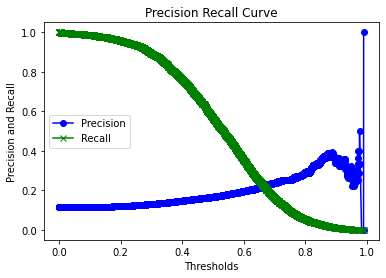

In [ ]:
prec, rec, thresh = precision_recall_curve(y_test, preds_proba)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'best')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Curve')
plt.show()

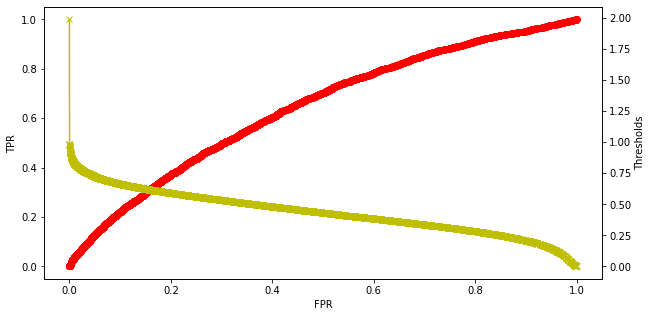

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, preds_proba)
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(fpr, tpr, marker = 'o', c = 'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1 = ax.twinx()
ax1.plot(fpr, thresh, marker = 'x', c = 'y')
ax1.set_ylabel('Thresholds')
plt.show()

In [ ]:
acc = []
f1 = []
prec = []
rec = []
thresh = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for i in thresh:
    pred = (preds_proba >= i).astype(bool)
    f1.append(f1_score(y_test, pred))
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
res = pd.DataFrame({"Thresholds" : thresh, "Accuracy" : acc, "F1" : f1, "Precision" : prec, "Recall" : rec})
res

,Thresholds,Accuracy,F1,Precision,Recall
0,0.10,0.139281,0.207832,0.116163,0.985612
1,0.15,0.158683,0.209881,0.117592,0.975420
2,0.20,0.190962,0.213356,0.120050,0.957734
3,0.25,0.239861,0.220014,0.124661,0.935851
4,0.30,0.305484,0.227375,0.130292,0.892086
5,0.35,0.385014,0.237493,0.138405,0.836031
6,0.40,0.470039,0.247648,0.147872,0.761391
7,0.45,0.552316,0.255667,0.157910,0.671163
8,0.50,0.627279,0.257795,0.166991,0.565048
9,0.55,0.698122,0.261074,0.181404,0.465528


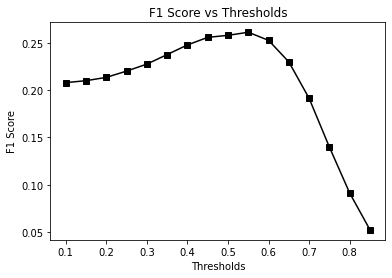

In [ ]:
plt.plot(thresh, f1, marker = 's', c = 'k')
plt.xlabel('Thresholds')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Thresholds')
plt.show()